In [3]:
import os
import sys
sys.path.append(os.path.abspath('.\Common'))

import dart as dart
import naver
import krx

import pickle
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NANUMGOTHIC'

import mongodb

naver_stock = naver.stock_da()
naver_index = naver.index_da()
mongo = mongodb.da()

In [2]:
# dollar = naver.get_ts_data_exchange('$', 398)
# naver.mongo.client.asset.dollar.insert_many(dollar.reset_index().to_dict('records'))

# oil = naver.get_ts_data_oil('oil', 472)
# naver.mongo.client.asset.oil.insert_many(oil.reset_index().to_dict('records'))

# interest = naver.get_ts_data_interest('interest', 682)
# naver.mongo.client.asset.interest.insert_many(interest.reset_index().to_dict('records'))

# kosdaq = naver.get_ts_data_kor_index('kosdaq', 995)
# kospi = naver.get_ts_data_kor_index('kospi', 1315)

# naver.mongo.client.asset.kospi.insert_many(kospi.reset_index().to_dict('records'))
# naver.mongo.client.asset.kosdaq.insert_many(kosdaq.reset_index().to_dict('records'))

# for i, row in naver.code_df.iterrows():
#     print(i,row['name'], row['code'])    
    
#     naver.mongodb.client.asset[row['code']+'_연간'].drop()
#     연간 = naver.get_종합정보_기업실적분석_연간(code)
#     naver.mongodb.client.asset[row['code']+'_연간'].insert_many(연간.reset_index().to_dict('records'))
    
#     naver.mongodb.client.asset[row['code']+'_분기'].drop()
#     분기 = naver.get_종합정보_기업실적분석_분기(code)
#     naver.mongodb.client.asset[row['code']+'_분기'].insert_many(분기.reset_index().to_dict('records'))    

# mongo.insert_new(mongo.client.asset.dollar, naver.get_ts_data_exchange('$', 2), '날짜')
# mongo.insert_new(mongo.client.asset.kospi, naver.get_ts_data_kor_index('kospi', 2), '날짜')
# mongo.insert_new(mongo.client.asset.kospi, naver.get_ts_data_kor_index('kosdaq', 2), '날짜')

In [6]:
naver.get_종합정보_기업실적분석('063570')

,2016.12,2017.12,2018.12,2019.12(E),2018.09,2018.12,2019.03,2019.06,2019.09,2019.12(E)
매출액,2155,2410,2944,,722,740,667,677,726,
영업이익,155,211,249,,69,57,31,47,55,
당기순이익,132,164,123,,39,35,12,14,33,
영업이익률,7.18,8.74,8.46,,9.49,7.71,4.61,6.88,7.61,
순이익률,6.13,6.82,4.17,,5.41,4.70,1.83,2.12,4.49,
ROE(지배주주),12.96,13.54,15.11,,16.60,15.11,12.68,6.98,6.61,
부채비율,90.42,142.69,149.03,,170.02,149.03,158.61,175.93,177.83,
당좌비율,144.70,148.97,120.87,,124.17,120.87,106.21,109.90,104.80,
유보율,731.21,830.03,1044.06,,1022.69,1044.06,1032.73,1055.56,1077.09,
EPS(원),511,596,621,,110,106,46,48,102,


In [7]:
for i, row in naver.code_df.iloc[:].iterrows():
    print(i,row['name'], row['code'])    
    
    naver.mongodb.client.asset[row['code']+'_연간'].drop()
    연간 = naver.get_종합정보_기업실적분석_연간(row['code'])
    if 연간 is not None:
        naver.mongodb.client.asset[row['code']+'_연간'].insert_many(연간.reset_index().to_dict('records'))
    
    naver.mongodb.client.asset[row['code']+'_분기'].drop()
    분기 = naver.get_종합정보_기업실적분석_분기(row['code'])
    if 분기 is not None:
        naver.mongodb.client.asset[row['code']+'_분기'].insert_many(분기.reset_index().to_dict('records'))    

0 DSR 155660
1 GS글로벌 001250
2 HDC현대산업개발 294870
3 HSD엔진 082740
4 LG이노텍 011070
5 LG헬로비전 037560
6 LS산전 010120
7 OCI 010060
8 S&TC 100840
9 S&T모티브 064960
10 SK이노베이션 096770
11 STX 011810
12 WISCOM 024070
13 갤럭시아에스엠 011420
14 경동인베스트 012320
15 고려아연 010130
16 고려제강 002240
17 국보 001140
18 극동유화 014530
19 까뮤이앤씨 013700
20 남양유업 003920
21 대영포장 014160
22 대원제약 003220
23 대한유화 006650
24 대한해운 005880
25 동아쏘시오홀딩스 000640
26 동양 001520
27 락앤락 115390
28 마니커 027740
29 메리츠금융지주 138040
30 모두투어리츠 204210
31 부국증권 001270
32 사조씨푸드 014710
33 삼성SDI 006400
34 삼성바이오로직스 207940
35 삼성출판사 068290
36 삼성화재해상보험 000810
37 삼양홀딩스 000070
38 삼영전자공업 005680
39 삼영화학공업 003720
40 상상인증권 001290
41 선도전기 007610
42 선진 136490
43 세방전지 004490
44 세원셀론텍 091090
45 신성이엔지 011930
46 신풍제약 019170
47 신한알파리츠 293940
48 신한지주 055550
49 에넥스 011090
50 에스원 012750
51 영화금속 012280
52 원림 005820
53 윌비스 008600
54 유나이티드 033270
55 인지컨트롤스 023800
56 인터지스 129260
57 일동제약 249420
58 제일연마 001560
59 제일파마홀딩스 002620
60 제주항공 089590
61 조흥 002600
62 지역난방공사 071320
63 지코 010580
64 진도 088

983 케이씨씨 002380
984 케이씨씨글라스 344820
985 코리아오토글라스 152330
986 코오롱글로벌 003070
987 콤텍시스템 031820
988 쿠쿠홈시스 284740
989 크라운제과 264900
990 토니모리 214420
991 티탑스 030790
992 페이퍼코리아 001020
993 포스코 005490
994 포스코강판 058430
995 하나니켈2호 099350
996 하나제약 293480
997 한국가스공사 036460
998 한국화장품제조 003350
999 한미글로벌 053690
1000 한솔피엔에스 010420
1001 한양증권 001750
1002 한진중공업 097230
1003 한진중공업홀딩스 003480
1004 한화 000880
1005 한화솔루션 009830
1006 현대에너지솔루션 322000
1007 현대일렉트릭 267260
1008 현대제철 004020
1009 DSC인베스트먼트 241520
1010 IBKS제7호스팩 276920
1011 NHN벅스 104200
1012 SDN 099220
1013 SK4호스팩 307070
1014 SKC 솔믹스 057500
1015 SK머티리얼즈 036490
1016 UCI 038340
1017 WI 073570
1018 가비아 079940
1019 강스템바이오텍 217730
1020 경남스틸 039240
1021 교보7호스팩 267320
1022 국순당 043650
1023 글로벌텍스프리 204620
1024 나노 187790
1025 나라엠앤디 051490
1026 나무가 190510
1027 네오위즈홀딩스 042420
1028 네이블커뮤니케이션즈 153460
1029 녹십자랩셀 144510
1030 대성미생물 036480
1031 대신밸런스제7호스팩 332290
1032 대양전기공업 108380
1033 대원 007680
1034 대한뉴팜 054670
1035 덕산네오룩스 213420
1036 덕산하이메탈 077360
1037 동국산업 005160
1038 동국제약

1903 대륙제관 004780
1904 대모 317850
1905 대성엘텍 025440
1906 대성창투 027830
1907 대양제지 006580
1908 대정화금 120240
1909 대창스틸 140520
1910 덱스터 206560
1911 동국S&C 100130
1912 동양에스텍 060380
1913 동양이엔피 079960
1914 동양피엔에프 104460
1915 동일철강 023790
1916 드래곤플라이 030350
1917 디스플레이텍 066670
1918 디에스케이 109740
1919 디오스텍 196450
1920 디자인 227100
1921 디젠스 113810
1922 디케이디앤아이 033310
1923 레이 228670
1924 리메드 302550
1925 마이크로텍 227950
1926 매일유업 267980
1927 멀티캠퍼스 067280
1928 메가스터디교육 215200
1929 메디프론 065650
1930 명성티엔에스 257370
1931 모바일어플라이언스 087260
1932 미투온 201490
1933 바른손이앤에이 035620
1934 바이오로그디바이스 208710
1935 바이오솔루션 086820
1936 바이오톡스텍 086040
1937 버추얼텍 036620
1938 베스파 299910
1939 부방 014470
1940 비츠로셀 082920
1941 빅솔론 093190
1942 삼목에스폼 018310
1943 삼성스팩2호 291230
1944 상상인 038540
1945 상신전자 263810
1946 서울반도체 046890
1947 서진시스템 178320
1948 서플러스글로벌 140070
1949 세화피앤씨 252500
1950 센트럴바이오 051980
1951 셀리버리 268600
1952 셀트리온헬스케어 091990
1953 소리바다 053110
1954 소프트센 032680
1955 솔고바이오 043100
1956 솔루에타 154040
1957 쇼박스 086980
1958 스타모빌리티 158310
1959 시스웍

In [4]:
row

name    LPK로보틱스
code     183350
Name: 279, dtype: object

In [31]:
naver.mongodb.client.asset['155660'+'_분기'].find_one()

{'BPS(원)': '35847',
 'EPS(원)': '731',
 'PBR(배)': '3.40',
 'PER(배)': '30.99',
 'ROE(지배주주)': '12.97',
 '_id': ObjectId('5e7b4a1bbd8b8755c6b0fab9'),
 'index': datetime.datetime(2018, 12, 31, 0, 0),
 '당기순이익': '1240',
 '당좌비율': '193.84',
 '매출액': '15165',
 '배당성향(%)': '',
 '부채비율': '66.09',
 '순이익률': '8.18',
 '시가배당률(%)': '',
 '영업이익': '2133',
 '영업이익률': '14.06',
 '유보율': '41077.90',
 '주당배당금(원)': ''}

In [33]:
naver.mongodb.collection_to_df(naver.mongodb.client.asset['155660'+'_분기'], 'index')

,BPS(원),EPS(원),PBR(배),PER(배),ROE(지배주주),당기순이익,당좌비율,매출액,배당성향(%),부채비율,순이익률,시가배당률(%),영업이익,영업이익률,유보율,주당배당금(원)
index,,,,,,,,,,,,,,,,
2020-12-31,39913,1509,4.67,52.72,10.56,1962,146.37,17874,,89.11,10.98,,1734,9.70,44216.06,
2020-03-31,,961,,162.28,,1287,,17798,,,7.23,,2227,12.51,,
2019-09-30,39065,761,4.02,56.90,8.39,853,159.60,16648,,83.41,5.12,,2021,12.14,43303.99,
2019-06-30,37760,481,3.02,43.87,8.11,278,162.56,16303,,82.41,1.70,,1283,7.87,42374.64,
2019-03-31,36319,787,3.41,33.32,12.16,876,175.50,15109,,80.15,5.80,,2062,13.65,41598.10,
2018-12-31,35847,731,3.40,30.99,12.97,1240,193.84,15165,,66.09,8.18,,2133,14.06,41077.90,


In [16]:
for row in naver.mongodb.client.asset[row['code']+'_연간'].find():
    print(row)

{'_id': ObjectId('5e7b48e8bd8b8755c6b0fab1'), 'index': datetime.datetime(2017, 12, 31, 0, 0), '매출액': '46785', '영업이익': '11792', '당기순이익': '7701', '영업이익률': '25.21', '순이익률': '16.46', 'ROE(지배주주)': '18.50', '부채비율': '51.16', '당좌비율': '206.19', '유보율': '36789.46', 'EPS(원)': '4689', 'PER(배)': '37.10', 'BPS(원)': '32429', 'PBR(배)': '5.37', '주당배당금(원)': '289', '시가배당률(%)': '0.17', '배당성향(%)': '5.50'}
{'_id': ObjectId('5e7b48e8bd8b8755c6b0fab2'), 'index': datetime.datetime(2018, 12, 31, 0, 0), '매출액': '55869', '영업이익': '9425', '당기순이익': '6279', '영업이익률': '16.87', '순이익률': '11.24', 'ROE(지배주주)': '12.97', '부채비율': '66.09', '당좌비율': '193.84', '유보율': '41077.90', 'EPS(원)': '3937', 'PER(배)': '30.99', 'BPS(원)': '35847', 'PBR(배)': '3.40', '주당배당금(원)': '314', '시가배당률(%)': '0.26', '배당성향(%)': '7.07'}
{'_id': ObjectId('5e7b48e8bd8b8755c6b0fab3'), 'index': datetime.datetime(2019, 12, 31, 0, 0), '매출액': '65934', '영업이익': '7101', '당기순이익': '3968', '영업이익률': '10.77', '순이익률': '6.02', 'ROE(지배주주)': '10.56', '부채비율': '89.11', '당좌비율': '14

In [6]:
code = '035420'
naver.get_종합정보_기업실적분석(code)

,0,1,2,3,4,5,6,7,8,9
매출액,46785,55869,65934,74822,15165,15109,16303,16648,17874,17798
영업이익,11792,9425,7101,10263,2133,2062,1283,2021,1734,2227
당기순이익,7701,6279,3968,7971,1240,876,278,853,1962,1287
영업이익률,25.21,16.87,10.77,13.72,14.06,13.65,7.87,12.14,9.70,12.51
순이익률,16.46,11.24,6.02,10.65,8.18,5.80,1.70,5.12,10.98,7.23
ROE(지배주주),18.50,12.97,10.56,14.61,12.97,12.16,8.11,8.39,10.56,
부채비율,51.16,66.09,89.11,,66.09,80.15,82.41,83.41,89.11,
당좌비율,206.19,193.84,146.37,,193.84,175.50,162.56,159.60,146.37,
유보율,36789.46,41077.90,44216.06,,41077.90,41598.10,42374.64,43303.99,44216.06,
EPS(원),4689,3937,3538,5507,731,787,481,761,1509,961


In [5]:
naver.get_종합정보_기업실적분석_연간(code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
2017-12-31,46785,11792,7701,25.21,16.46,18.50,51.16,206.19,36789.46,4689,37.10,32429,5.37,289,0.17,5.50
2018-12-31,55869,9425,6279,16.87,11.24,12.97,66.09,193.84,41077.90,3937,30.99,35847,3.40,314,0.26,7.07
2019-12-31,65934,7101,3968,10.77,6.02,10.56,89.11,146.37,44216.06,3538,52.72,39913,4.67,376,0.20,9.38
2020-12-31,74822,10263,7971,13.72,10.65,14.61,,,,5507,28.33,45460,3.43,344,,


In [6]:
naver.get_종합정보_기업실적분석_분기(code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
2018-12-31,15165,2133,1240,14.06,8.18,12.97,66.09,193.84,41077.90,731,30.99,35847,3.40,,,
2019-03-31,15109,2062,876,13.65,5.80,12.16,80.15,175.50,41598.10,787,33.32,36319,3.41,,,
2019-06-30,16303,1283,278,7.87,1.70,8.11,82.41,162.56,42374.64,481,43.87,37760,3.02,,,
2019-09-30,16648,2021,853,12.14,5.12,8.39,83.41,159.60,43303.99,761,56.90,39065,4.02,,,
2020-12-31,17874,1734,1962,9.70,10.98,10.56,89.11,146.37,44216.06,1509,52.72,39913,4.67,,,
2020-03-31,17798,2227,1287,12.51,7.23,,,,,961,162.28,,,,,


In [76]:
tl = pd.read_html(URL, encoding='euc-kr')

In [115]:
tl[3].columns.droplevel(1).to_frame()

,,0,1
주요재무정보,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,주요재무정보,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t...
최근 연간 실적,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,최근 연간 실적,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t...
최근 분기 실적,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,최근 분기 실적,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t...
Unnamed: 3_level_0,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,Unnamed: 3_level_0,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t...
Unnamed: 4_level_0,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,Unnamed: 4_level_0,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t...
Unnamed: 5_level_0,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,Unnamed: 5_level_0,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t...
Unnamed: 6_level_0,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,Unnamed: 6_level_0,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t...
Unnamed: 7_level_0,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,Unnamed: 7_level_0,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t...
Unnamed: 8_level_0,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,Unnamed: 8_level_0,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t...
Unnamed: 9_level_0,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,Unnamed: 9_level_0,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t...


In [80]:
tl[3]

,주요재무정보,최근 연간 실적,최근 분기 실적,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0
,\n\t\t\t\t\t\t\t\t\t\t\t2017.12\n\t\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t2018.12\n\t\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t2019.12\n\t\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t2020.12(E)\n\t\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t2018.12\n\t\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t2019.03\n\t\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t2019.06\n\t\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t2019.09\n\t\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t2019.12\n\t\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t2020.03(E)\n\t\t\t\t\t\t\t\t\t\t,Unnamed: 10_level_1
,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\tIFRS연결\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,Unnamed: 10_level_2
0,매출액,46785.00,55869.00,65934.00,74822.00,15165.00,15109.00,16303.00,16648.00,17874.00,17798.00
1,영업이익,11792.00,9425.00,7101.00,10263.00,2133.00,2062.00,1283.00,2021.00,1734.00,2227.00
2,당기순이익,7701.00,6279.00,3968.00,7971.00,1240.00,876.00,278.00,853.00,1962.00,1287.00
3,영업이익률,25.21,16.87,10.77,13.72,14.06,13.65,7.87,12.14,9.70,12.51
4,순이익률,16.46,11.24,6.02,10.65,8.18,5.80,1.70,5.12,10.98,7.23
5,ROE(지배주주),18.50,12.97,10.56,14.61,12.97,12.16,8.11,8.39,10.56,NaN
6,부채비율,51.16,66.09,89.11,NaN,66.09,80.15,82.41,83.41,89.11,NaN
7,당좌비율,206.19,193.84,146.37,NaN,193.84,175.50,162.56,159.60,146.37,NaN


In [13]:
index_str = '날짜'
mongo.collection_to_df(naver.mongo.client.asset.interest, index_str).head()

,받으실 때,보내실 때,파실 때
날짜,,,
2020-03-20,0.00%,0.00,1.02
2020-03-19,0.00%,0.00,1.02
2020-03-18,0.00%,0.00,1.02
2020-03-17,-26.62%,0.37,1.02
2020-03-16,0.00%,0.00,1.39


In [14]:
index_str = 'xymd'
mongo.collection_to_df(naver.mongo.client.asset.dow, index_str).head()

,clos,diff,gvol,high,low,open,rate,symb
xymd,,,,,,,,
2020-03-20,19173.98,-913.21,880374321,20531.26,19094.27,20253.15,-4.55,DJI@DJI
2020-03-19,20087.19,188.27,795798217,20442.63,19177.13,19830.01,0.95,DJI@DJI
2020-03-18,19898.92,-1338.46,874090339,20489.33,18917.46,20188.69,-6.30,DJI@DJI
2020-03-17,21237.38,1048.86,795840174,21379.35,19882.26,20487.05,5.20,DJI@DJI
2020-03-16,20188.52,-2997.10,775906049,21768.28,20116.46,20917.53,-12.93,DJI@DJI


In [17]:
index_str = '날짜'
mongo.collection_to_df(naver.mongo.client.asset.kospi, index_str).head()

,거래대금(백만),거래량(천주),등락률,전일비,체결가
날짜,,,,,
2020-03-20,10632970.0,817021.0,+7.44%,108.51,1566.15
2020-03-19,11932492.0,977674.0,-8.39%,133.56,1457.64
2020-03-18,9576387.0,728007.0,-4.86%,81.24,1591.20
2020-03-17,9709076.0,649779.0,-2.47%,42.42,1672.44
2020-03-16,8593833.0,682003.0,-3.19%,56.58,1714.86


In [18]:
index_str = '날짜'
mongo.collection_to_df(naver.mongo.client.asset.kosdaq, index_str).head()

,거래대금(백만),거래량(천주),등락률,전일비,체결가
날짜,,,,,
2020-03-20,6503974.0,1243149.0,+9.20%,39.40,467.75
2020-03-19,8575181.0,1646248.0,-11.71%,56.79,428.35
2020-03-18,7410179.0,1322271.0,-5.75%,29.59,485.14
2020-03-17,7993286.0,1367413.0,+2.03%,10.22,514.73
2020-03-16,7219385.0,1201664.0,-3.72%,19.49,504.51


In [43]:
dow.head()

,clos,diff,gvol,high,low,open,rate,symb
xymd,,,,,,,,
2020-03-20,19173.98,-913.21,880374321,20531.26,19094.27,20253.15,-4.55,DJI@DJI
2020-03-19,20087.19,188.27,795798217,20442.63,19177.13,19830.01,0.95,DJI@DJI
2020-03-18,19898.92,-1338.46,874090339,20489.33,18917.46,20188.69,-6.30,DJI@DJI
2020-03-17,21237.38,1048.86,795840174,21379.35,19882.26,20487.05,5.20,DJI@DJI
2020-03-16,20188.52,-2997.10,775906049,21768.28,20116.46,20917.53,-12.93,DJI@DJI


In [44]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
kospi['n체결가'] = min_max_scaler.fit_transform(kospi[['체결가']])
kosdaq['n체결가'] = min_max_scaler.fit_transform(kosdaq[['체결가']])
dow['n체결가'] = min_max_scaler.fit_transform(dow[['clos']])

In [52]:
dow.loc[:'2006-01-01']

,clos,diff,gvol,high,low,open,rate,symb,n체결가
xymd,,,,,,,,,
2020-03-20,19173.98,-913.21,880374321,20531.26,19094.27,20253.15,-4.55,DJI@DJI,0.548893
2020-03-19,20087.19,188.27,795798217,20442.63,19177.13,19830.01,0.95,DJI@DJI,0.588590
2020-03-18,19898.92,-1338.46,874090339,20489.33,18917.46,20188.69,-6.30,DJI@DJI,0.580406
2020-03-17,21237.38,1048.86,795840174,21379.35,19882.26,20487.05,5.20,DJI@DJI,0.638589
2020-03-16,20188.52,-2997.10,775906049,21768.28,20116.46,20917.53,-12.93,DJI@DJI,0.592995
2020-03-13,23185.62,1985.00,843080954,23189.76,21285.37,21973.82,9.36,DJI@DJI,0.723279
2020-03-12,21200.62,-2352.60,911774226,22837.95,21154.46,22184.71,-9.99,DJI@DJI,0.636991
2020-03-11,23553.22,-1464.94,663956266,24604.63,23328.32,24604.63,-5.86,DJI@DJI,0.739258
2020-03-10,25018.16,1167.14,654859333,25020.99,23690.34,24453.00,4.89,DJI@DJI,0.802939


In [56]:
dow.index.min(), kospi.index.min(), kosdaq.index.min()

(Timestamp('2002-01-02 00:00:00'),
 Timestamp('1990-01-04 00:00:00'),
 Timestamp('1996-07-02 00:00:00'))

In [60]:
kospi.체결가.idxmin()

Timestamp('1998-06-16 00:00:00')

In [66]:
kospi.체결가[:1].values[0]

1566.15

In [68]:
kospi.체결가[:1].values[0] / kospi.체결가.max() 

0.6027850157224838

In [70]:
dow.clos[:1].values[0] / dow.clos.max()

0.6488344722520949

In [16]:
index_str = '날짜'
kospi = mongo.collection_to_df(mongo.client.asset.kospi, index_str)

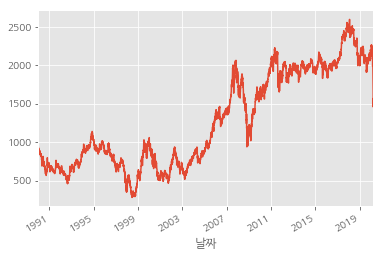

In [18]:
kospi.체결가.plot()

In [20]:
index_str = 'xymd'
dow = mongo.collection_to_df(mongo.client.asset.dow, index_str)

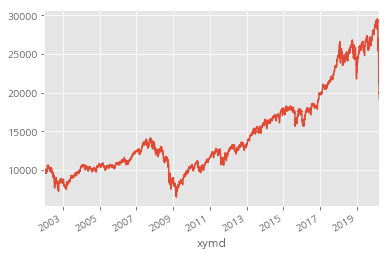

In [21]:
dow.clos.plot()

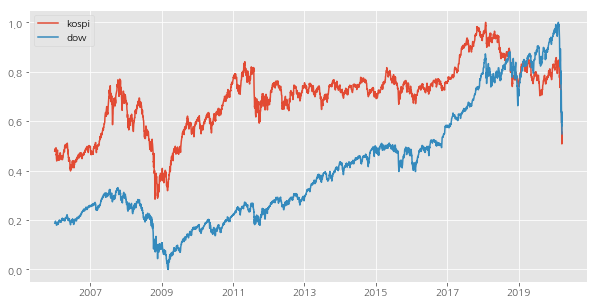

In [57]:
plt.figure(figsize=(10,5))
plt.plot(kospi.loc[:'2006-01-01'].n체결가, label='kospi')
# plt.plot(kosdaq.loc[:'2006-01-01'].n체결가, label='kosdaq')
plt.plot(dow.loc[:'2006-01-01'].n체결가, label='dow')
plt.legend()